# ０　元ネタ：ここを参考に実装しました
- アプリ開発：Jupyter上でDashを使えるjupyter_dash
 - https://qiita.com/OgawaHideyuki/items/725f4ffd93ffb0d30b6c
- Layout ( dash_bootstrap_components )
 - https://dash-bootstrap-components.opensource.faculty.ai/docs/components/layout/

# １　必要なライブラリのインストール

In [ ]:
!pip install jupyter_dash dash_canvas dash-bootstrap-components

# ２　ライブラリのインポート

## Webアプリ関係

In [ ]:
from jupyter_dash import JupyterDash 
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc


# ３　Viewだけの練習



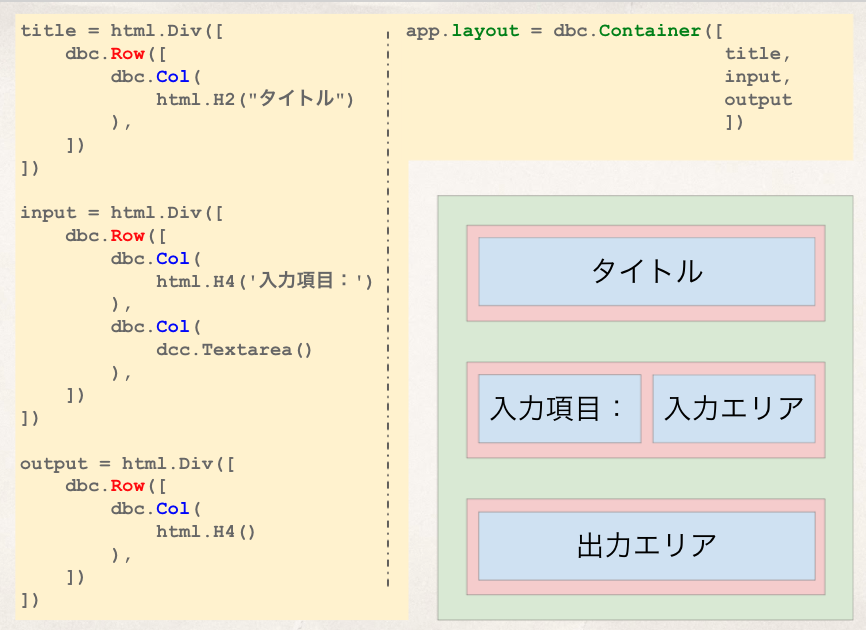

In [ ]:
app = JupyterDash(__name__, 
                external_stylesheets=[dbc.themes.BOOTSTRAP],
                meta_tags=[{
                    'name': 'viewport',
                    'content': 'width=device-width, initial-scale=1.0'
                    }]
                )

# View
title = html.Div([
    dbc.Row([
        dbc.Col(
            html.H2("タイトル"), width="auto"
        ),
    ], justify="center")
])

input = html.Div([
    dbc.Row([
        dbc.Col(
            html.H4('入力項目：'), width="auto"
        ),
        dbc.Col(
            html.H4("入力エリア"), width="auto"
        ),
    ], no_gutters=True, justify="center")
])

output = html.Div([
    dbc.Row([
        dbc.Col(
            html.H4("出力エリア"), width="auto"
        ),
    ], justify="center")
])

app.layout = dbc.Container([
                            title, 
                            input, 
                            output
                            ])

app.run_server(mode="inline")

# ４　ModelとControllerの練習

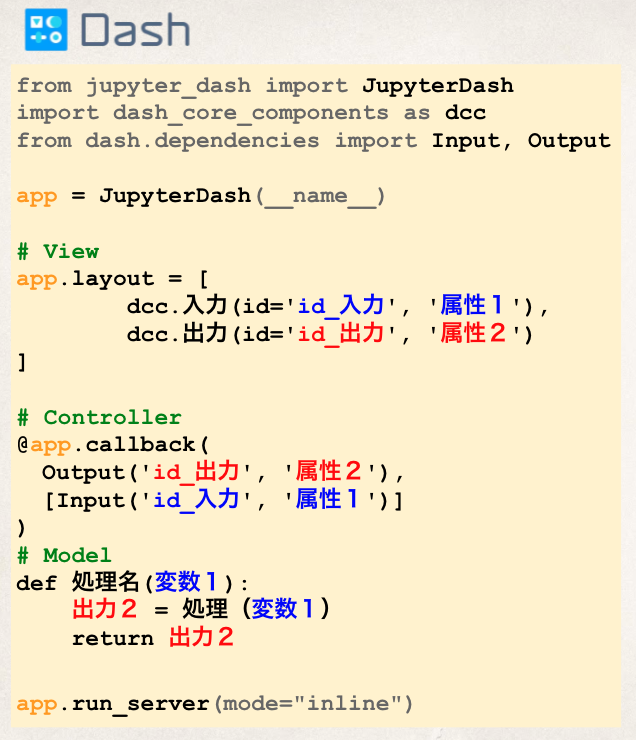

In [ ]:
app = JupyterDash(__name__, 
                external_stylesheets=[dbc.themes.BOOTSTRAP],
                meta_tags=[{
                    'name': 'viewport',
                    'content': 'width=device-width, initial-scale=1.0'
                    }]
                )

# View
title = html.Div([
    dbc.Row([
        dbc.Col(
            html.H2("文字の入出力"), width="auto"
        ),
    ], justify="center")
])

input = html.Div([
    dbc.Row([
        dbc.Col(
            html.H4('文字：'), width="auto"
        ),
        dbc.Col(
            dcc.Textarea(id="id_input"), width="auto"
        ),
    ], no_gutters=True, justify="center")
])

output = html.Div([
    dbc.Row([
        dbc.Col(
            html.H4(id="id_output"), width="auto"
        ),
    ], justify="center")
])

app.layout = dbc.Container([
                            title, 
                            input, 
                            output
                            ])

# Controller
@app.callback(
	Output('id_output', 'children'),
	[Input('id_input', 'value')],
    # prevent_initial_call=True,
)
# Model
def make_graph(input_text):
    # if input_text in ["", None]:
    #     return "何か入力して下さい"
    return f'「{input_text}」が入力されました'

app.run_server(mode="inline")

In [ ]:
app.config

## 計算させてみる

In [ ]:
app = JupyterDash(__name__, 
                external_stylesheets=[dbc.themes.BOOTSTRAP],
                meta_tags=[{
                    'name': 'viewport',
                    'content': 'width=device-width, initial-scale=1.0'
                    }]
                )

# View
title = html.Div([
    dbc.Row([
        dbc.Col(
            html.H2("ＢＭＩの計算"), width="auto"
        ),
    ], justify="center")
], style={'margin':'0px 0px 20px 0px'})

input_height = html.Div([
    dbc.Row([
        dbc.Col(
            html.H4('身長(cm)：'), width="auto"
        ),
        dbc.Col(
            dcc.Input(id="id_height", type='number'), width="auto"
        ),
    ], no_gutters=True, justify="center")
])

input_weight = html.Div([
    dbc.Row([
        dbc.Col(
            html.H4('体重(kg)：'), width="auto"
        ),
        dbc.Col(
            dcc.Input(id="id_weight"), width="auto"
        ),
    ], no_gutters=True, justify="center"),
])

output = html.Div([
    dbc.Row([
        dbc.Col(
            html.H4(id="id_output"), width="auto"
        ),
    ], justify="center")
], style={'margin':'20px 0px 0px 0px'})

app.layout = dbc.Container([
                            title, 
                            input_height, 
                            input_weight, 
                            output
                            ])

# Controller
@app.callback(
	Output('id_output', 'children'),
	[Input('id_height', 'value'),
     Input('id_weight', 'value')],
)
# Model
def make_graph(height, weight):
    height = float(height)
    weight = float(weight)
    bmi = weight/(height/100)**2
    return f'あなたのＢＭＩは、{bmi:.1f}  です。'

app.run_server(mode="inline")

## グラフで表示してみる

In [ ]:
import plotly.express as px

app = JupyterDash(__name__, 
                external_stylesheets=[dbc.themes.BOOTSTRAP],
                meta_tags=[{
                    'name': 'viewport',
                    'content': 'width=device-width, initial-scale=1.0'
                    }]
                )

# View
title = html.Div([
    dbc.Row([
        dbc.Col(
            html.H3("ＢＭＩの計算"), width="auto"
        ),
    ], justify="center"),
])

input_height = html.Div([
    dbc.Row([
        dbc.Col(
            html.H5('身長(cm)：'), width="auto"
        ),
        dbc.Col(
            dcc.Input(id="id_height", type='number'), width="auto",
        ),
    ], no_gutters=True, justify="center")
])

input_weight = html.Div([
    dbc.Row([
        dbc.Col(
            html.H5('体重(kg) ：'), width="auto"
        ),
        dbc.Col(
            dcc.Input(id="id_weight", type='number'), width="auto",
        ),
    ], no_gutters=True, justify="center"),
])

output = html.Div([
    dbc.Row([
        dbc.Col(
            html.H4(id="id_output"), width="auto"
        ),
    ], justify="center")
], style={'margin':'20px 0px 0px 0px'})

graph = html.Div([
    dbc.Row([
        dbc.Col(
            dcc.Graph(id="id_graph",
                      config={'displayModeBar':False},
            ), width="auto"
        ),
    ], justify="center")
])

app.layout = dbc.Container([
                            title, 
                            input_height, 
                            input_weight, 
                            output,
                            graph,
                            ])

# Controller
@app.callback(
	Output('id_output', 'children'),
	Output('id_graph', 'figure'),
	[Input('id_height', 'value'),
     Input('id_weight', 'value')],)
# Model
def make_graph(height, weight): 
    height = float(height)
    weight = float(weight)

    bmi = weight/(height/100)**2
    fig = px.scatter(x=[weight], y=[height])
    fig.update_layout(xaxis_title='体　重（kg）', xaxis={'range':[30, 130]}, 
                    yaxis_title='身　長（cm）', yaxis={'range':[120, 200]},
                    margin={'l':0, 'r':0, 't':10, 'b':0},
                    )
  
    return f'あなたのＢＭＩは、{bmi:.1f}  です。', fig

app.run_server(mode="inline")

## グラフをブラッシュアップ & CSSテーマの変更
- Theme explorer ( dash_bootstrap_components ) テーマを見て確認できる
 - https://dash-bootstrap-components.opensource.faculty.ai/docs/themes/explorer/

In [ ]:
import plotly.graph_objects as go
import numpy as np

def bmi_graph(weight, height):
    try:
        bmi = weight/(height/100)**2
        # msg = f'あなたのＢＭＩは、{bmi:.1f}  です。'
    except:
        weight = height = bmi = 0
        # msg = '身長と体重を入力してください。'

    boundary = [18.5, 25, 35]
    wt = np.linspace(30, 130, 10)
    ht = [np.sqrt(wt/b)*100 for b in boundary]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=wt, y=ht[2], fill='tozeroy', mode='lines', 
                             name='高度肥満', line={'color':'red'}))
    fig.add_trace(go.Scatter(x=wt, y=ht[1], fill='tonexty', mode='lines', 
                             name='肥満', line={'color':'yellow'}))
    fig.add_trace(go.Scatter(x=wt, y=ht[0], fill='tonexty', mode='lines', 
                             name='標準', line={'color':'green'}))
    fig.add_trace(go.Scatter(x=[0, 0], y=[ht[0][0], 200], fill='tonexty', 
                             mode='lines', name='低体重', line={'color':'blue'}))
    
    fig.add_trace(go.Scatter(x=[weight], y=[height], mode='markers', 
                             name='あなた', marker={'size':15, 'color':'red'}, 
                             text=f"BMI={bmi:.1f}"
                             ))
    
    fig.update_layout(xaxis_title='体　重（kg）', xaxis={'range':[30, 130]}, 
                      yaxis_title='身　長（cm）', yaxis={'range':[120, 200]},
                      margin={'l':0, 'r':0, 't':10, 'b':0},
                      )
    return fig

init_fig = bmi_graph(0, 0)

app = JupyterDash(__name__, 
                external_stylesheets=[dbc.themes.BOOTSTRAP],
                meta_tags=[{
                    'name': 'viewport',
                    'content': 'width=device-width, initial-scale=1.0'
                    }]
                )

# View
title = html.Div([
    dbc.Row([
        dbc.Col(
            html.H3("ＢＭＩはどのあたり"), width="auto"
        ),
    ], justify="center"),
])

input_height = html.Div([
    dbc.Row([
        dbc.Col(
            html.H5('身長(cm)：'), width="auto"
        ),
        dbc.Col(
            dcc.Input(id="id_height", type='number'), width="auto",
        ),
    ], no_gutters=True, justify="center")
])

input_weight = html.Div([
    dbc.Row([
        dbc.Col(
            html.H5('体重(kg) ：'), width="auto"
        ),
        dbc.Col(
            dcc.Input(id="id_weight", type='number'), width="auto",
        ),
    ], no_gutters=True, justify="center"),
])

graph = html.Div([
    dbc.Row([
        dbc.Col(
            dcc.Graph(id="id_graph",
                      figure=init_fig,
                      config={'displayModeBar':False},
            ), width="auto"
        ),
    ], justify="center")
])

app.layout = dbc.Container([
                            title, 
                            input_height, 
                            input_weight, 
                            graph,
                            ])

# Controller
@app.callback(
	Output('id_graph', 'figure'),
	[Input('id_height', 'value'),
     Input('id_weight', 'value')],
    prevent_initial_call=True,
)
# Model
def make_graph(height, weight): 
    try:
        height = float(height)
        weight = float(weight)
    except:
        height = weight = 0    
    fig = bmi_graph(weight, height)    
    return fig

app.run_server(mode="inline")

# ５　Ｗｅｂアプリのデプロイ

## externalモードでWebアプリを起動

In [ ]:
app.run_server(mode='external', host="localhost", port=8050) #, debug=False)

## トンネリングで公開ＵＲＬを発行

In [ ]:
# cloudflaredのインストール　＆　localhostの8050ポートのトンネリングした公開URLを発行
!wget https://bin.equinox.io/c/VdrWdbjqyF/cloudflared-stable-linux-amd64.deb
!dpkg -i cloudflared-stable-linux-amd64.deb
!cloudflared tunnel --url localhost:8050